
# UNHCR Forcibly Displaced Populations Casptone Project

## Random Forest Classifier

---


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.model_selection import GridSearchCV
from pactools.grid_search import GridSearchCVProgressBar
from sklearn.metrics import  plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report
from sklearn import preprocessing
import scikitplot as skplt
import warnings

In [9]:
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('/Users/dayosangowawa/Desktop/GA/DSI20-lessons/projects/project-capstone/My Capstone/Forcibly displaced persons - Capstone Dayo Sangowawa/cleaned_unhcrdf_final.csv')
df.head()

,Unnamed: 0,country_of_origin,country_of_asylum,population_type,urban_or_rural_location,accommodation_type,female_aged_0-4 years,female_aged_5-11 years,female_aged_12-17 years,female_aged_18-59 years,female_aged_over_60_years,male_aged_0-4_years,male_aged_5-11_years,male_aged_12-17 years,male_aged_18-59_years,male_aged_over_60_years
0,0,Colombia,Aruba,ASY,Urban,I,0,0,0,0,0,0,0,0,5,0
1,1,Cuba,Aruba,ASY,Urban,I,0,0,0,0,0,0,0,0,0,0
2,2,Afghanistan,Afghanistan,IDP,Rural,I,0,14,16,37,0,0,15,17,38,5
3,3,Afghanistan,Afghanistan,IDP,Urban,Q,74,810,853,2004,140,75,840,921,2278,206
4,4,Afghanistan,Afghanistan,IDP,Urban,Q,12,130,138,321,21,12,135,147,365,33


In [11]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

In [12]:
y = df.pop('accommodation_type')
X = pd.get_dummies(df, drop_first=True)

In [13]:
print('Baseline prediction: ', y.value_counts(normalize=True).max())

Baseline prediction:  0.8497186815375424


In [14]:
lb = preprocessing.LabelBinarizer()

In [15]:
y = lb.fit_transform(y)

#'0 'if it is 'I 'and '1' if it is 'other'. 

In [16]:
y = y.ravel()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=1)

In [18]:
rfc = RandomForestClassifier()

### GridSearch

In [19]:
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [X.shape[1] + 1],
    'criterion' :['gini', 'entropy']
}

In [20]:
rfc_gs = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

In [21]:
rfc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [385],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [22]:
rfc_gs.best_params_

{'criterion': 'entropy', 'max_depth': 385, 'max_features': 'sqrt'}

### Using the best parameters from the Grid Search 

In [23]:
rfc_best = RandomForestClassifier(criterion = 'entropy',
                                         max_depth=385,
                                         max_features='sqrt')

In [24]:
rfc_best.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=385, max_features='sqrt')

In [25]:
print('Accuracy score - train set:', rfc_best.score(X_train, y_train))
print('Accuracy score - test set:', rfc_best.score(X_test, y_test))
print('Mean CV score - train: ', cross_val_score(rfc_best, X_train, y_train, cv=5).mean())

Accuracy score - train set: 0.9871631293956556
Accuracy score - test set: 0.9564973861090366
Mean CV score - train:  0.9550320241580806


### Feature Importances

In [40]:
feat_import = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rfc_best.feature_importances_
})

feat_import.sort_values('Importance', ascending=False, inplace=True)
feat_import.head(20)

,Feature,Importance
383,urban_or_rural_location_Urban,0.221522
8,male_aged_18-59_years,0.042480
3,female_aged_18-59 years,0.032160
234,country_of_asylum_Bulgaria,0.029610
1,female_aged_5-11 years,0.027644
7,male_aged_12-17 years,0.025900
381,population_type_REF,0.025236
2,female_aged_12-17 years,0.024378
277,country_of_asylum_Hungary,0.023936
6,male_aged_5-11_years,0.023899


In [41]:
feat_import.reset_index(inplace=True)

In [42]:
feat_import.drop(columns=['index'] ,inplace=True)

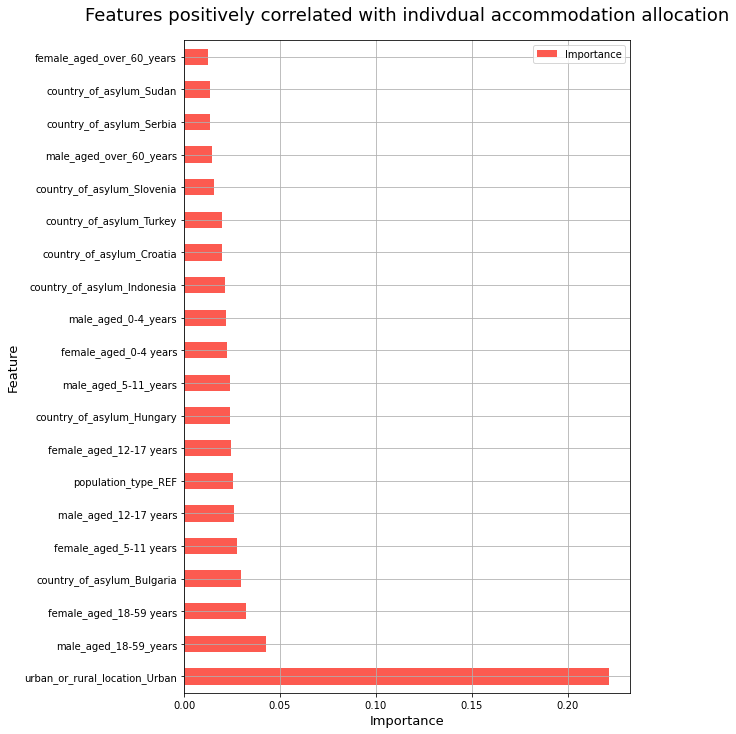

In [43]:
feat_import.nlargest(20, columns=['Importance']).plot(kind='barh', x='Feature', y='Importance', figsize=(8, 12), color='#FC5A50')
plt.xlabel('Importance', fontsize=13)
plt.ylabel('Feature', fontsize=13)
plt.title('Features positively correlated with indivdual accommodation allocation', fontsize=18, pad=20)
plt.grid()
plt.savefig('topfeatures_randomforest.png', dpi=300, bbox_inches = "tight")
plt.show();

As seen in the dataframe below, there are 29 features that do not have any affect on the target variable (feature importance of 0). These features could have been removed at the prior to the modelling process.

The bar chart belows shows the features that are most negatively correlated with the target variable (the likelihood of being allocated individual accommodation).

In [79]:
feat_import_neg = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rfc_best.feature_importances_
})

feat_import_neg.sort_values('Importance', ascending=True, inplace=True)
feat_import_neg.head(30)

,Feature,Importance
186,country_of_origin_Switzerland,0.000000e+00
164,country_of_origin_San Marino,0.000000e+00
161,country_of_origin_Saint Martin France,0.000000e+00
38,country_of_origin_Cabo Verde,0.000000e+00
153,country_of_origin_Puerto Rico,0.000000e+00
42,country_of_origin_Cayman Islands,0.000000e+00
145,country_of_origin_Palau,0.000000e+00
139,country_of_origin_Niue,0.000000e+00
134,country_of_origin_Netherlands,0.000000e+00
48,"country_of_origin_China, Macao Special Adminis...",0.000000e+00


In [73]:
neg_corr_features = feat_import_neg[feat_import_neg['Importance'] > 0].sort_values(by = 'Importance', ascending=True)

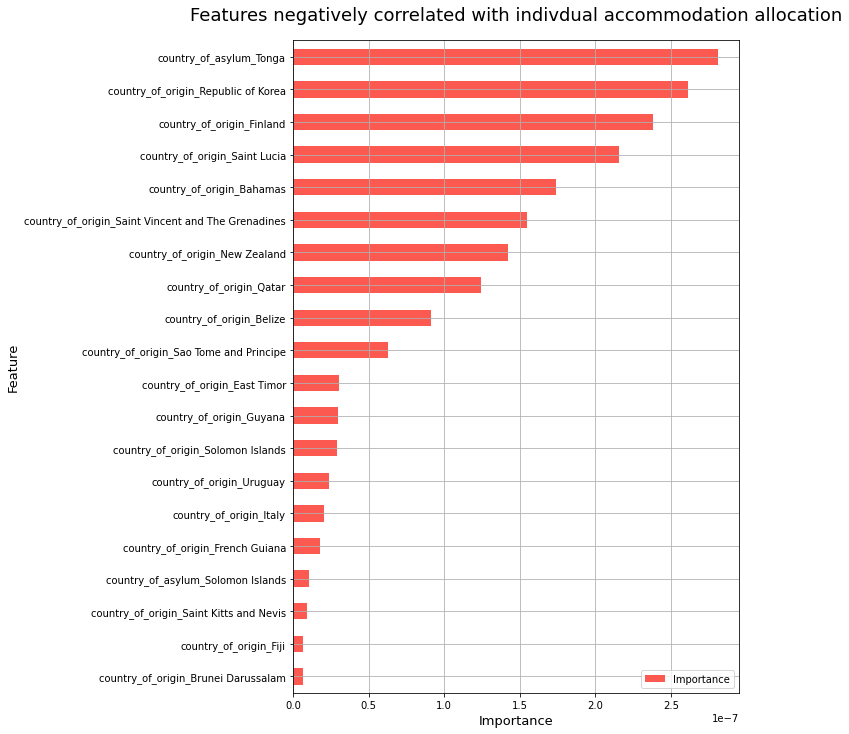

In [80]:
neg_corr_features.head(20).plot(kind='barh', x='Feature', y='Importance', figsize=(8, 12), color='#FC5A50')
plt.xlabel('Importance', fontsize=13)
plt.ylabel('Feature', fontsize=13)
plt.title('Features negatively correlated with indivdual accommodation allocation', fontsize=18, pad=20)
plt.grid()
plt.savefig('top_neg_features_randomforest.png', dpi=300, bbox_inches = "tight")
plt.show();

### Evaluation

In [31]:
y_test_pred = rfc_best.predict(X_test)

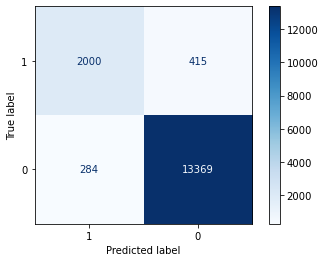

In [32]:
confus_matrix = plot_confusion_matrix(rfc_best, X_test, y_test, cmap='Blues', labels=[1, 0], values_format='.0f')
plt.savefig('rfc_confusion_matrix.png', dpi=300, bbox_inches = "tight")
plt.show()

In [33]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     13653
           1       0.88      0.83      0.85      2415

    accuracy                           0.96     16068
   macro avg       0.92      0.90      0.91     16068
weighted avg       0.96      0.96      0.96     16068



In [34]:
probabilities_train = rfc_best.predict_proba(X_train)

In [35]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", len(rfc_best.classes_)))

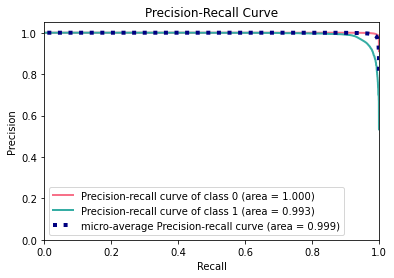

In [36]:
skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap)
plt.show()

In [37]:
print('Average precision score: ', average_precision_score(y_train, probabilities_train[:, 1]))


Average precision score:  0.9931709428679888


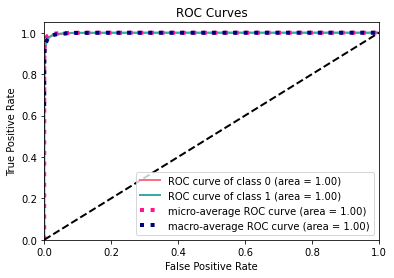

In [38]:
skplt.metrics.plot_roc(y_train, probabilities_train, cmap=cmap)
plt.savefig('rfc_roc_curve.png', dpi=300, bbox_inches = "tight")
plt.show()

In [39]:
print('Area under the curve : ', roc_auc_score(y_train, probabilities_train[:, 1]))

Area under the curve :  0.9986798139286128


In [ ]:
#scores indicate possible data leakage (both accuracy and precision scores). I could possibly apply PCA to reduce noise?